In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder #Transforma las variables categórica a numéricas

In [65]:
#Step 1. Load Data

df_raw = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [66]:
df_raw.sample(10, random_state=2025)
# X = [age, sex, bmi, childre, smoker, ''region'']
# y = charges

,age,sex,bmi,children,smoker,region,charges
1269,45,male,27.500,3,no,southwest,8615.30000
942,18,female,40.185,0,no,northeast,2217.46915
1240,52,male,41.800,2,yes,southeast,47269.85400
1229,58,male,30.305,0,no,northeast,11938.25595
272,41,male,37.050,2,no,northwest,7265.70250
738,23,male,31.730,3,yes,northeast,36189.10170
1105,54,female,31.240,0,no,southeast,10338.93160
1182,25,female,30.300,0,no,southwest,2632.99200
14,27,male,42.130,0,yes,southeast,39611.75770
596,42,female,29.480,2,no,southeast,7640.30920


In [67]:
#Step 2 Preprocessing

df_baking = df_raw.copy()
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking['region'] = df_baking['region'].astype('category')
df_baking['smoker'] = df_baking['smoker'].astype('category')
df_baking['dummy'] = np.random.normal(loc=10, scale=1, size=1338)
df_baking['charges'] = np.log(df_baking['charges'])
df = df_baking.copy()
df.info()

df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
 7   dummy     1338 non-null   float64 
dtypes: category(3), float64(3), int64(2)
memory usage: 56.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6  

In [68]:
#Step 3 EDA
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((1204, 8), (134, 8))

In [69]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,1204.0,39.181063,14.151788,18.000000,26.000000,39.000000,51.000000,64.000000
bmi,1204.0,30.643800,6.086388,15.960000,26.220000,30.400000,34.717500,53.130000
children,1204.0,1.093854,1.199333,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1204.0,9.103639,0.920947,7.022756,8.464704,9.151006,9.736511,11.063045
dummy,1204.0,10.028803,0.994501,6.892506,9.339242,10.037957,10.703307,13.135304


,count,unique,top,freq
sex,1204,2,male,604
smoker,1204,2,no,956
region,1204,4,southeast,320


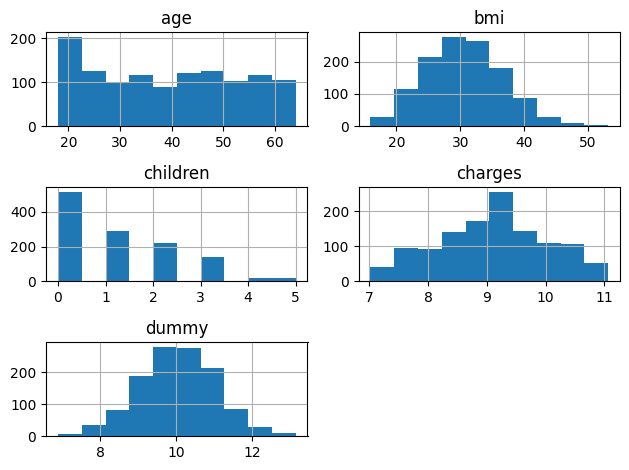

In [70]:
df_train.hist()
plt.tight_layout()
plt.show()

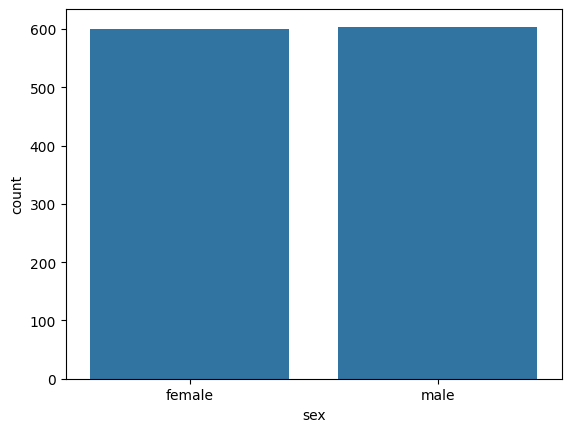

In [71]:
sns.countplot(df_train, x='sex')
plt.show()

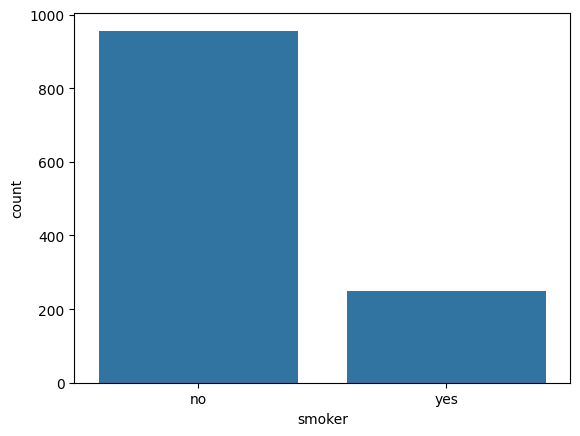

In [72]:
sns.countplot(df_train, x='smoker')
plt.show()

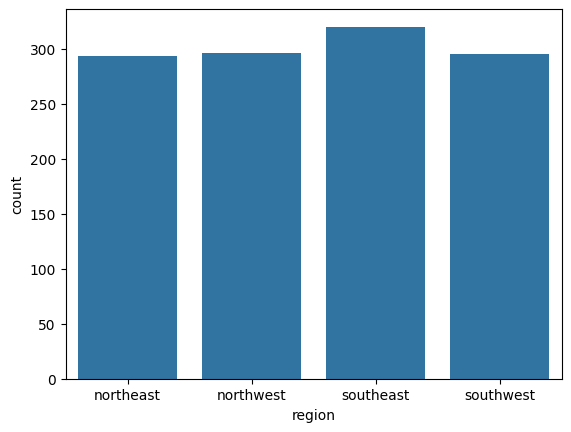

In [73]:
sns.countplot(df_train, x='region')
plt.show()

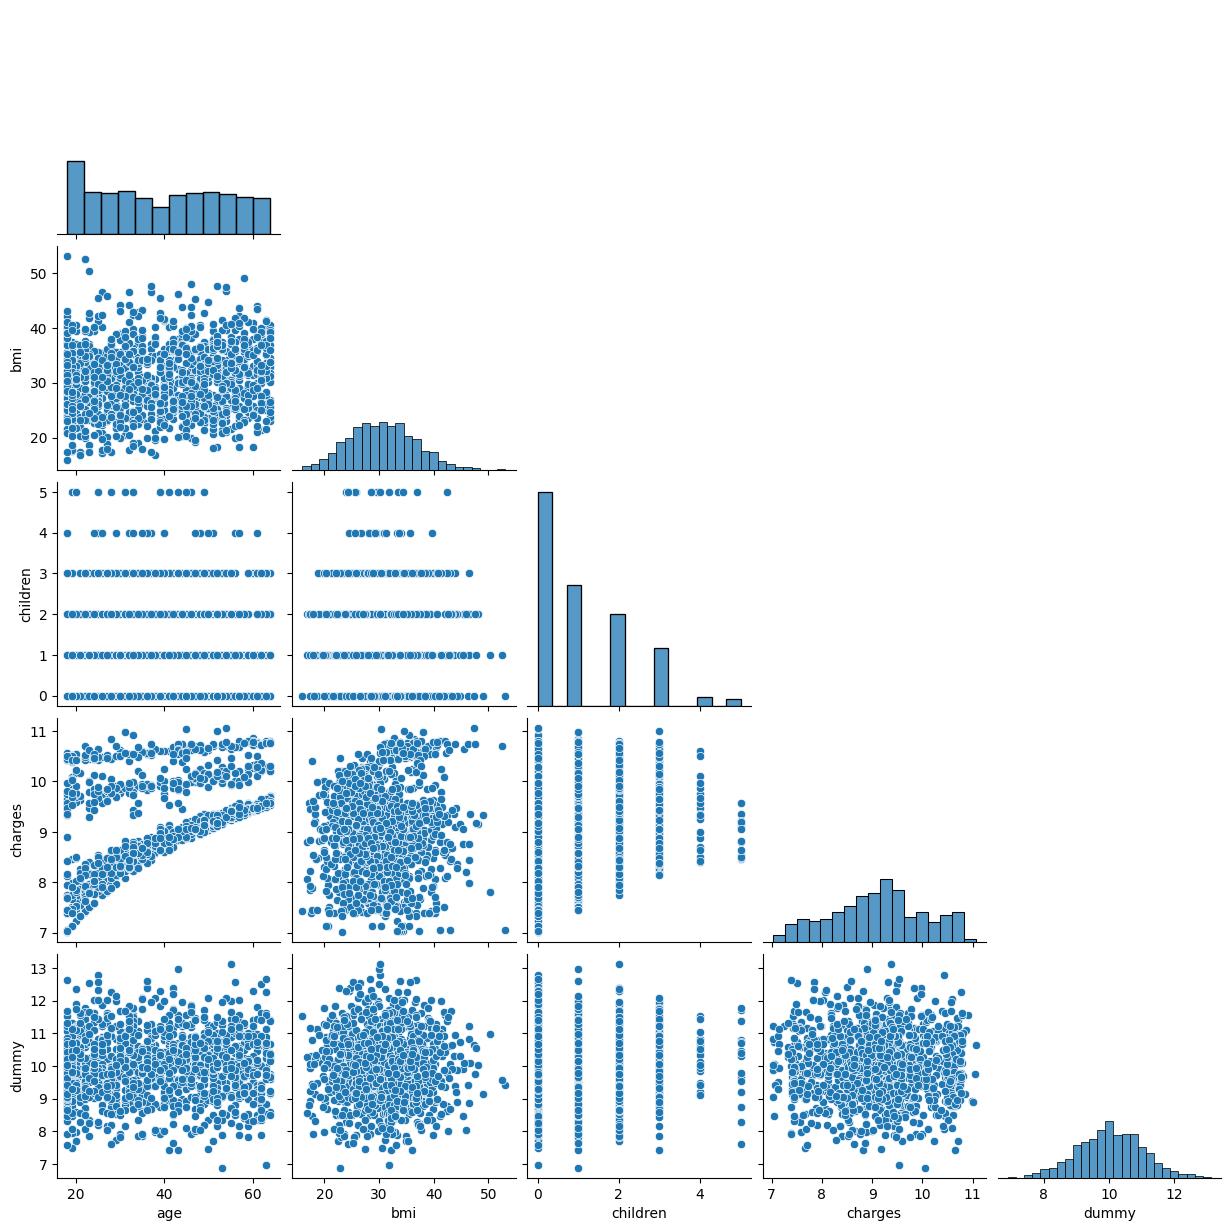

In [74]:
sns.pairplot(data=df_train, corner=True)
plt.show()

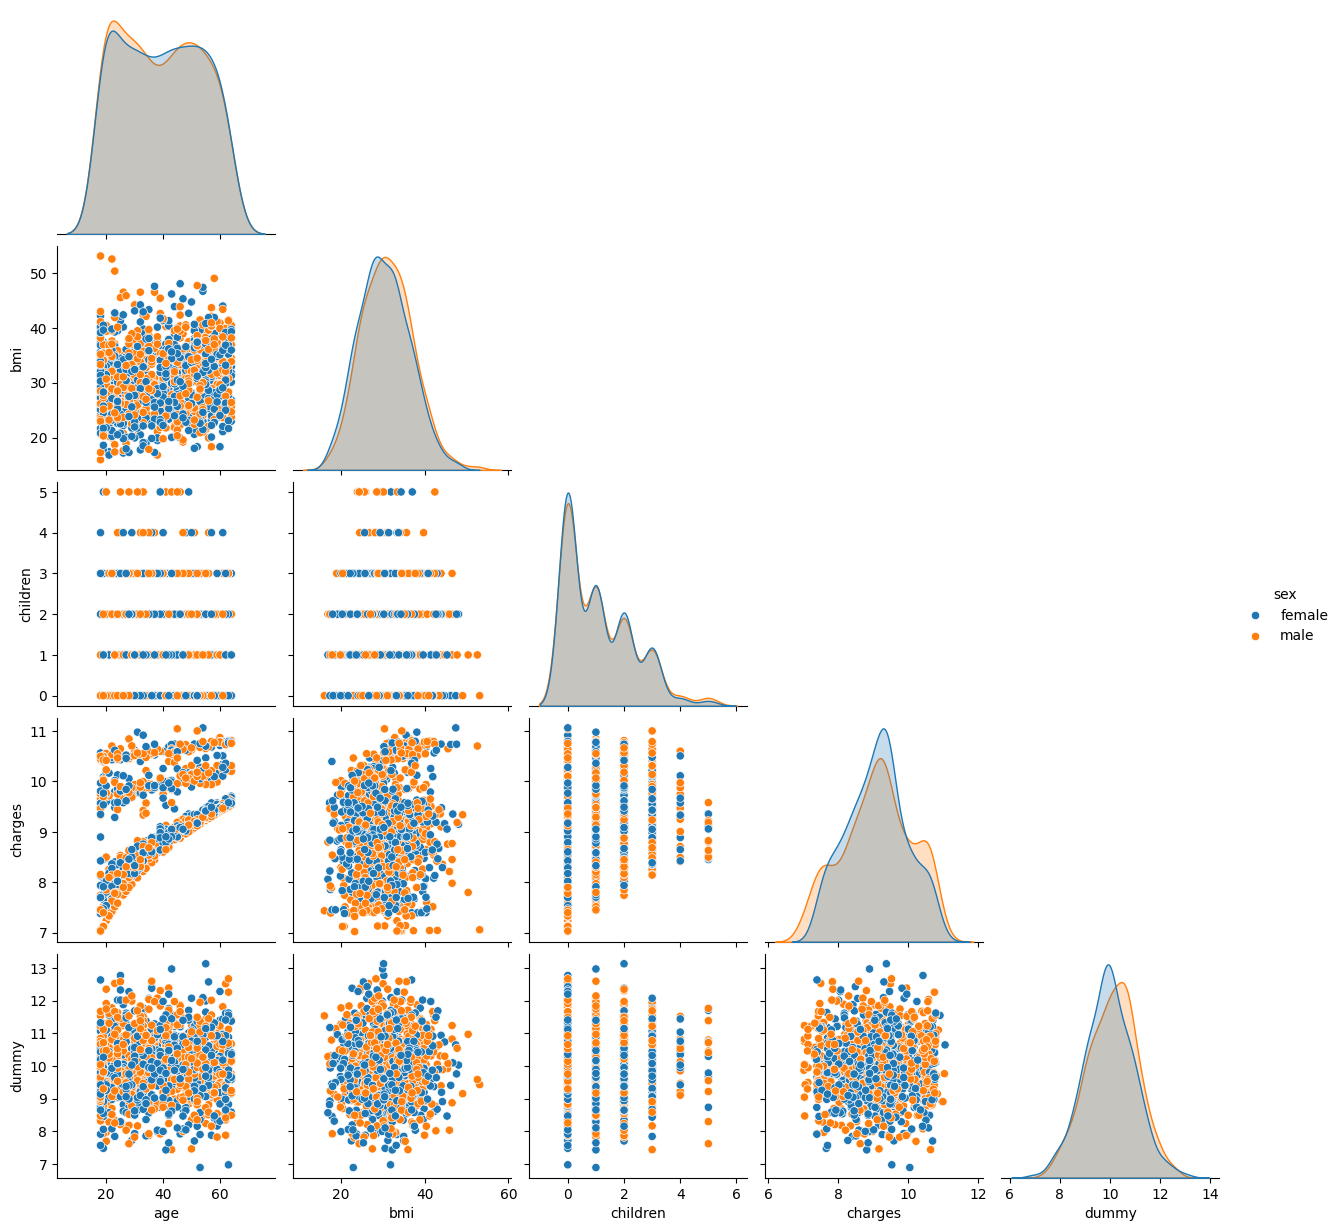

In [75]:
sns.pairplot(df_train, hue='sex', corner=True)
plt.show()

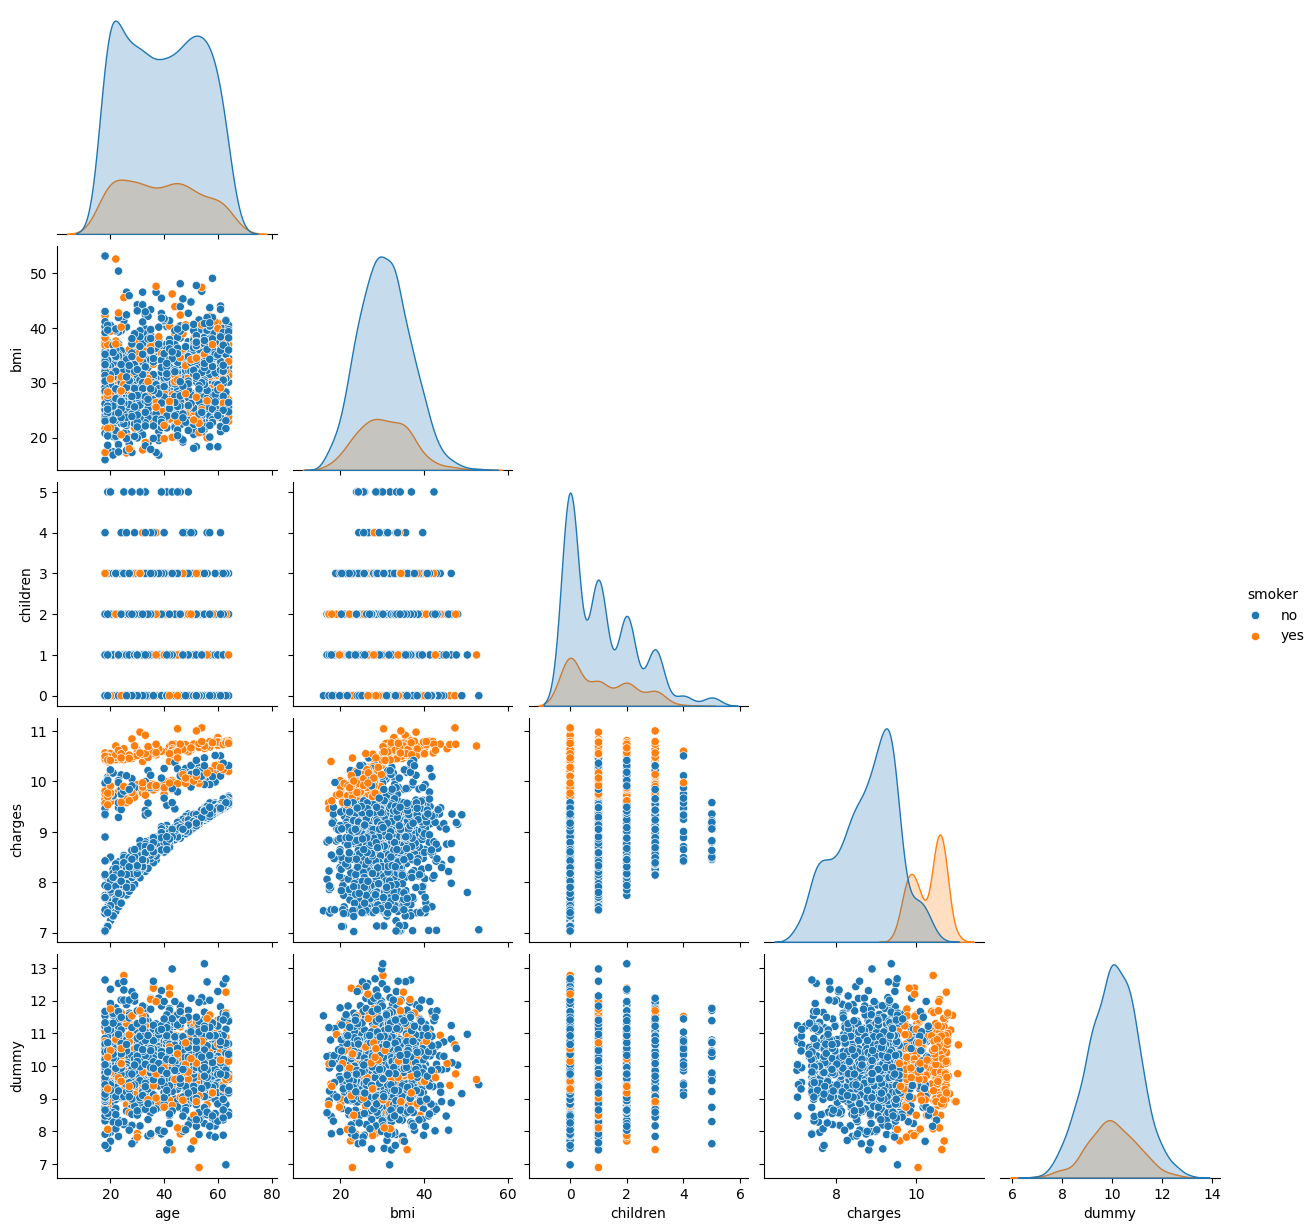

In [76]:
sns.pairplot(df_train, hue='smoker', corner=True)
plt.show()

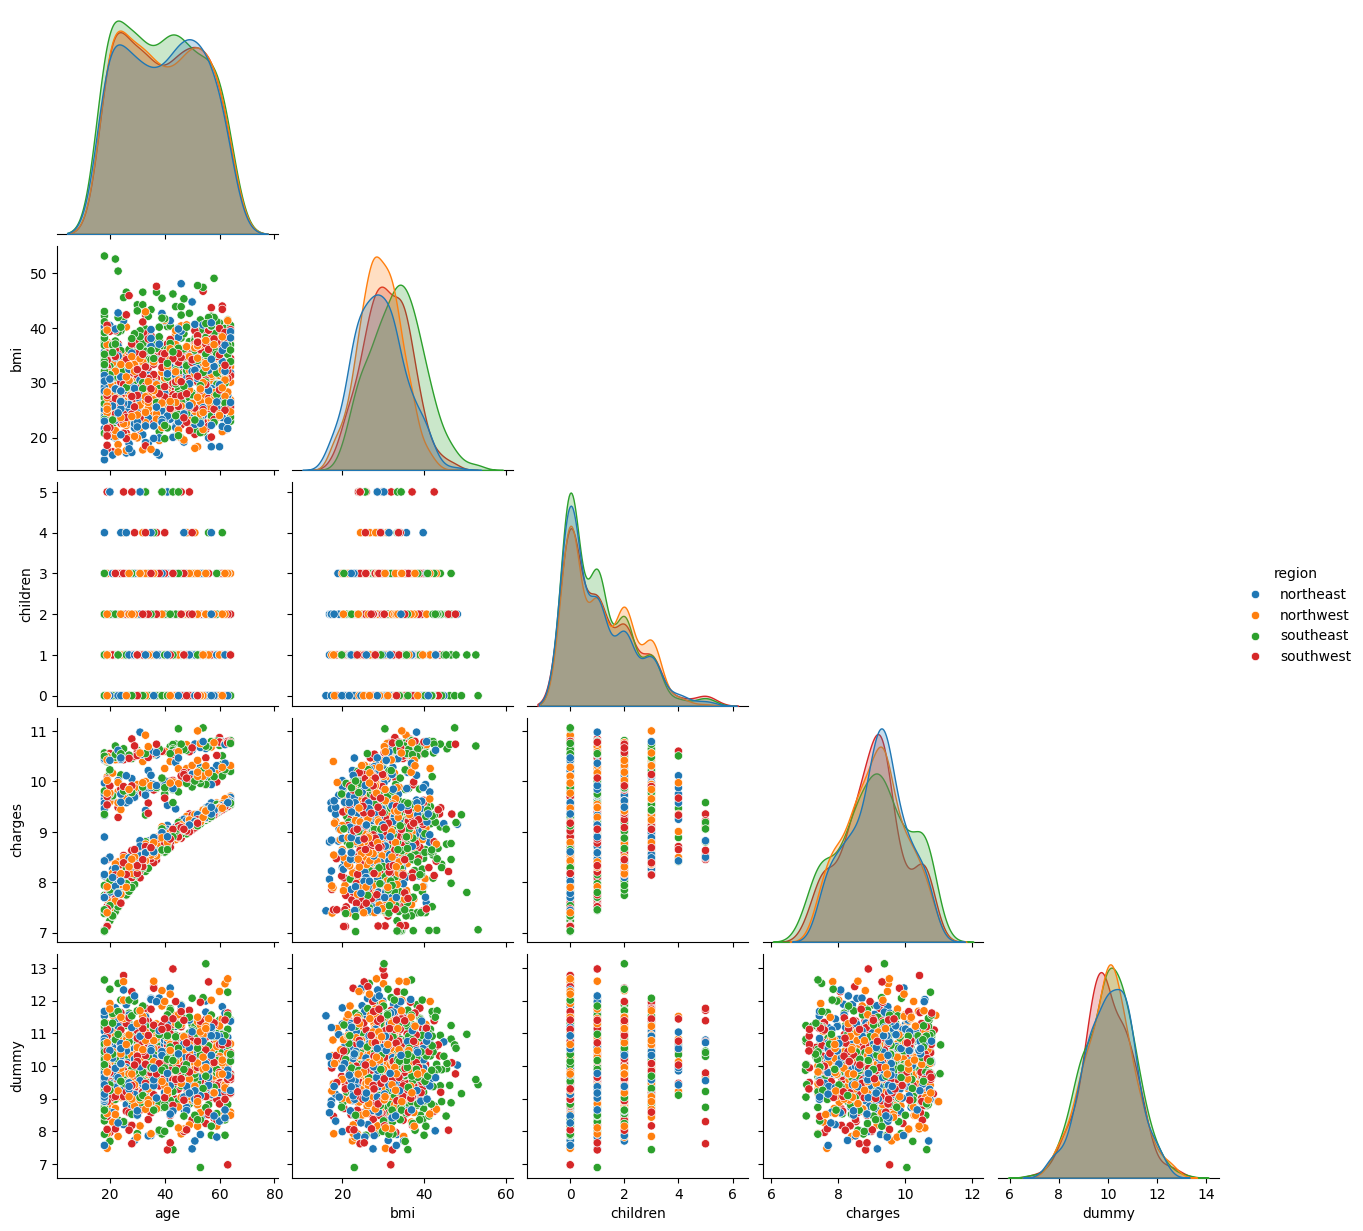

In [77]:
sns.pairplot(df_train, hue='region', corner=True)
plt.show()

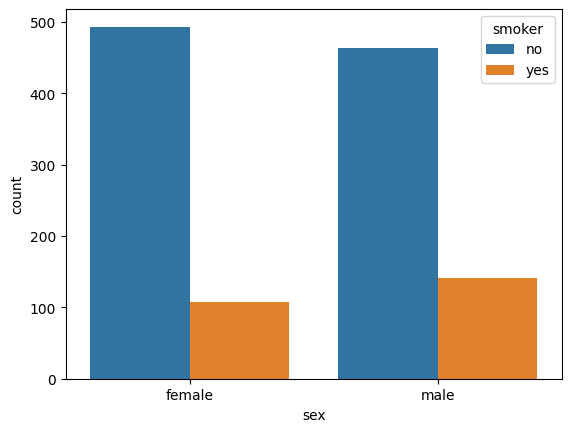

In [78]:
sns.countplot(df_train, x='sex', hue='smoker')
plt.show()

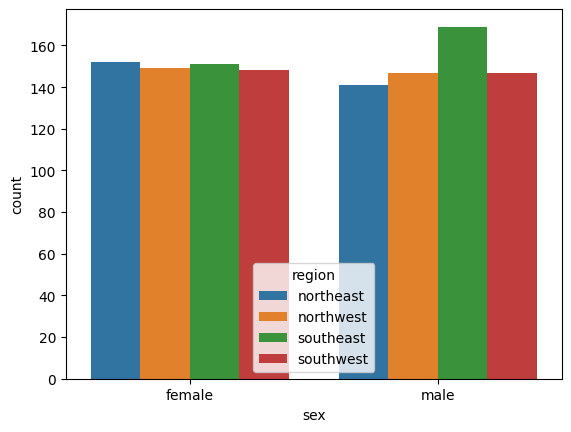

In [79]:
sns.countplot(df_train, x='sex', hue='region')
plt.show()

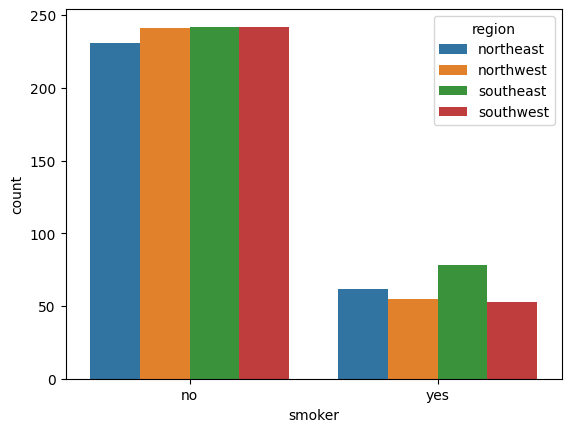

In [80]:
sns.countplot(df_train, x='smoker', hue='region')
plt.show()

In [81]:
#Step 4. ML
X_train = df_train.drop(columns='charges')
y_train = df_train['charges']

X_test = df_test.drop(columns='charges')
y_test = df_test['charges']

In [82]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns #Rango 0 y 1

num_proc = Pipeline(steps=[
    ('scaler',MinMaxScaler()) #MinMaxScaler escala los valores de una columna entre 0 y 1
])
#Para valores razonablemente simétricos se puede aplicar el StandarScaler escalando los valores a un promedio cero(0) y desviación estandar uno(1)
cat_proc = Pipeline(steps=[
    ('oneoht',OneHotEncoder(drop='first'))
])
processor = ColumnTransformer(transformers=[
    ('num',num_proc,num_cols),
    ('cat',cat_proc,cat_cols)
])
reg_lr = Pipeline(steps=[
    ('proce',processor),
    ('lreg',LinearRegression())
])

In [83]:
reg_lr.fit(X_train, y_train)
y_hat = reg_lr.predict(X_test)

print(f'MSE(Mean squeare error): {mean_squared_error(y_test, y_hat)}') #Prueba, prediccion
print(f'MAE(Mean absolute error): {mean_absolute_error(y_test, y_hat)}')
print(f'RMSE(Root mean squeare error): {np.sqrt(mean_squared_error(y_test, y_hat))}')
print(f'R2(R SQUARE): {r2_score(y_test, y_hat)}') #Porcentaje de variabilidad explicada


MSE(Mean squeare error): 0.15151136604003473
MAE(Mean absolute error): 0.24412411252707478
RMSE(Root mean squeare error): 0.38924460951955997
R2(R SQUARE): 0.8151934088428756


In [84]:
reg_lr['lreg'].intercept_

np.float64(7.853067221591491)

In [85]:
reg_lr['lreg'].coef_ #coef B_n, mientras mas grande el coeficiente es mas importante solo en LR

array([ 1.57846876,  0.48876406,  0.5191084 ,  0.03460976, -0.08060362,
        1.55463256, -0.04834541, -0.15400525, -0.11123245])

In [86]:
reg_lr['proce'].get_feature_names_out()

array(['num__age', 'num__bmi', 'num__children', 'num__dummy',
       'cat__sex_male', 'cat__smoker_yes', 'cat__region_northwest',
       'cat__region_southeast', 'cat__region_southwest'], dtype=object)

$$y=β_0+β_1*age+β_2*bmi+β_3*children+β_4*malesex+β_5*smokeryes+β_6*regionnw+β_7*regionse+β_8*regionsw$$

$$y=-2141.8+12017.6*age+12671.9*bmi+2771.3*children-198.4*malesex+23859.7*smokeryes-148.4*regionnw-993.7*regionse-705.4*regionsw$$

In [87]:
#Step 5. Predictor model
df_train.head(2)

,age,sex,bmi,children,smoker,region,charges,dummy
0,22,male,35.60,0,yes,southwest,10.479696,10.577297
1,19,male,35.53,0,no,northwest,7.406364,11.308124


In [88]:
my_value = pd.DataFrame({
    'age':[19],
    'sex':['male'],
    'bmi':[35.53],
    'children':[0],
    'smoker':['no'],
    'region':['northwest'],
    'dummy':[10]
})
reg_lr.predict(my_value)

array([8.03299473])

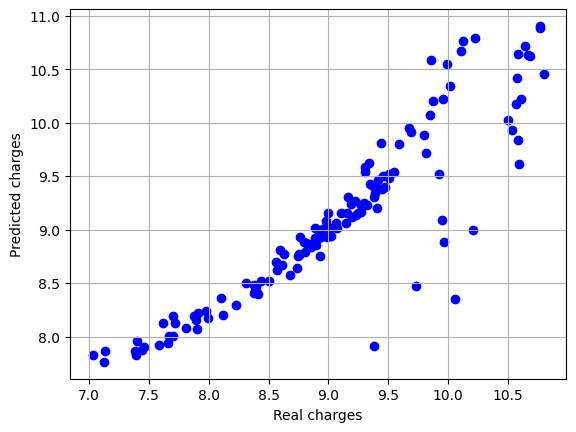

In [89]:
plt.scatter(x=y_test, y=y_hat, color='b')
plt.grid(True)
plt.xlabel('Real charges')
plt.ylabel('Predicted charges')
plt.show()

In [90]:
reg_lasso = Pipeline(steps=[
    ('proce',processor),
    ('reg_lasso',Lasso(alpha=100)) #Nos permite saber cuales valores estan de mas y que predictores son claves
])
reg_lasso.fit(X_train, y_train)
y_hat = reg_lasso.predict(X_test)

print(f'MSE(Mean squeare error): {mean_squared_error(y_test, y_hat)}') #Prueba, prediccion
print(f'MAE(Mean absolute error): {mean_absolute_error(y_test, y_hat)}')
print(f'RMSE(Root mean squeare error): {np.sqrt(mean_squared_error(y_test, y_hat))}')

MSE(Mean squeare error): 0.8223103062398401
MAE(Mean absolute error): 0.7171625517497415
RMSE(Root mean squeare error): 0.906813269774897


In [91]:
reg_lasso['reg_lasso'].coef_ #coef B_n, mientras mas grande el coeficiente es mas importante solo en LR

array([ 0.,  0.,  0., -0.,  0.,  0., -0., -0., -0.])

In [92]:
reg_lasso['proce'].get_feature_names_out()

array(['num__age', 'num__bmi', 'num__children', 'num__dummy',
       'cat__sex_male', 'cat__smoker_yes', 'cat__region_northwest',
       'cat__region_southeast', 'cat__region_southwest'], dtype=object)

In [93]:
reg_ridge = Pipeline(steps=[
    ('proce',processor),
    ('reg_ridge',Ridge(alpha=100))
])
reg_ridge.fit(X_train, y_train)
y_hat = reg_ridge.predict(X_test)

print(f'MSE(Mean squeare error): {mean_squared_error(y_test, y_hat)}') #Prueba, prediccion
print(f'MAE(Mean absolute error): {mean_absolute_error(y_test, y_hat)}')
print(f'RMSE(Root mean squeare error): {np.sqrt(mean_squared_error(y_test, y_hat))}')

MSE(Mean squeare error): 0.27735364314987926
MAE(Mean absolute error): 0.37772029366986143
RMSE(Root mean squeare error): 0.5266437535468158


In [94]:
reg_ridge['reg_ridge'].coef_ #coef B_n, mientras mas grande el coeficiente es mas importante solo en LR

array([ 0.84813622,  0.12965637,  0.2231075 ,  0.00497433, -0.0357121 ,
        1.01581276, -0.01054901, -0.05107345, -0.04851344])

In [95]:
reg_lasso['proce'].get_feature_names_out()

array(['num__age', 'num__bmi', 'num__children', 'num__dummy',
       'cat__sex_male', 'cat__smoker_yes', 'cat__region_northwest',
       'cat__region_southeast', 'cat__region_southwest'], dtype=object)